In [7]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('data/train')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['benign', 'malignant']
Types of classes labels found:  2


In [13]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('data'+'/train/'+item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [14]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                         image
0  benign   dataset_path/benign/100.jpg
1  benign  dataset_path/benign/1000.jpg
2  benign  dataset_path/benign/1001.jpg
3  benign  dataset_path/benign/1002.jpg
4  benign  dataset_path/benign/1004.jpg
         Labels                           image
2632  malignant  dataset_path/malignant/993.jpg
2633  malignant  dataset_path/malignant/996.jpg
2634  malignant  dataset_path/malignant/997.jpg
2635  malignant  dataset_path/malignant/998.jpg
2636  malignant  dataset_path/malignant/999.jpg


In [15]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2637
benign       1440
malignant    1197
Name: Labels, dtype: int64


In [18]:
import cv2
path = 'data/train/'
dataset_path = os.listdir('data/train/')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [19]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(2637, 224, 224, 3)

In [20]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['benign' 'benign' 'benign' ... 'malignant' 'malignant' 'malignant']
[0 0 0 ... 1 1 1]


In [21]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2505, 224, 224, 3)
(2505, 2)
(132, 224, 224, 3)
(132, 2)


In [25]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [26]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
79/79 - 336s - loss: 1.9587 - accuracy: 0.6563 - 336s/epoch - 4s/step
Epoch 2/30
79/79 - 314s - loss: 1.0909 - accuracy: 0.7134 - 314s/epoch - 4s/step
Epoch 3/30
79/79 - 307s - loss: 1.0018 - accuracy: 0.7429 - 307s/epoch - 4s/step
Epoch 4/30
79/79 - 312s - loss: 0.6884 - accuracy: 0.7521 - 312s/epoch - 4s/step
Epoch 5/30
79/79 - 295s - loss: 0.6816 - accuracy: 0.7573 - 295s/epoch - 4s/step
Epoch 6/30
79/79 - 282s - loss: 0.5

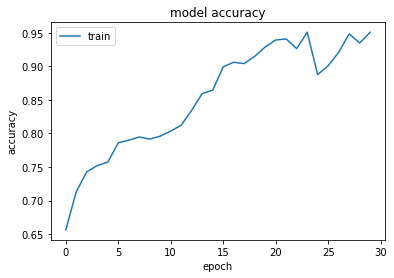

In [29]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)